This project identifies msg as spam or ham.
<br>
Steps performed in this project.
1. Data Cleaning
<br>
2. EDA
<br>
3. Data Preprocessing
<br>
4. Model Building and Evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = 'spam.csv'

In [4]:
df = pd.read_csv(file)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [5]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [121]:
df = pd.read_csv(file,encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [122]:
df.shape

(5572, 5)

In [123]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**Data Cleaning**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [125]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [126]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [128]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
encoder = LabelEncoder()

In [131]:
df['target'] = encoder.fit_transform(df['target'])

In [132]:
#ham = 0 and spam = 1
df['target'].head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int32

In [133]:
#checking missing values
df.isnull().sum()


target    0
text      0
dtype: int64

In [134]:
#checking the number of duplicate values
df.duplicated().sum()

403

In [135]:
#dropping duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [136]:
df.duplicated().sum()

0

In [137]:
df.shape

(5169, 2)

In [138]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


EDA

In [23]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

C:\Users\DELL\anaconda3\envs\deeplnenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

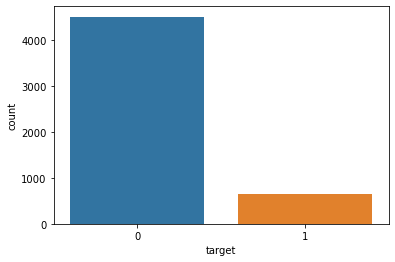

In [24]:
sns.countplot(df['target'])

In [25]:
ham = df[df['target'] == 0]
spam= df[df['target'] == 1]

In [26]:
ham

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [27]:
ham_sample = ham.sample(n=653)

In [28]:
df = pd.concat([ham_sample,spam],axis=0)

In [29]:
df

,target,text
989,0,Ugh. Gotta drive back to sd from la. My butt i...
1093,0,Well the weather in cali's great. But its comp...
140,0,"K, text me when you're on the way"
2259,0,Ill call you evening ill some ideas.
1155,0,"Sorry man, accidentally left my phone on silen..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


C:\Users\DELL\anaconda3\envs\deeplnenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

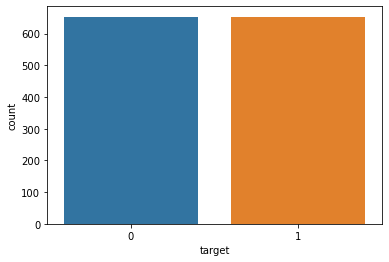

In [30]:
sns.countplot(df['target'])

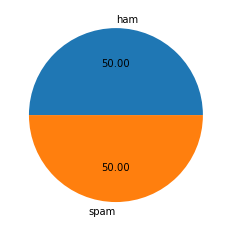

In [31]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [32]:
#data is imbalanced
#calculating the number of characters, words and sententes in our dataframe
!pip install nltk

In [33]:
import nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
#number of characters
df['num_of_chars'] = df['text'].apply(len)

In [36]:
df.head()

,target,text,num_of_chars
989,0,Ugh. Gotta drive back to sd from la. My butt i...,53
1093,0,Well the weather in cali's great. But its comp...,188
140,0,"K, text me when you're on the way",33
2259,0,Ill call you evening ill some ideas.,36
1155,0,"Sorry man, accidentally left my phone on silen...",91


In [37]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

989     [Ugh, ., Got, ta, drive, back, to, sd, from, l...
1093    [Well, the, weather, in, cali, 's, great, ., B...
140        [K, ,, text, me, when, you, 're, on, the, way]
2259       [Ill, call, you, evening, ill, some, ideas, .]
1155    [Sorry, man, ,, accidentally, left, my, phone,...
                              ...                        
5537    [Want, explicit, SEX, in, 30, secs, ?, Ring, 0...
5540    [ASKED, 3MOBILE, IF, 0870, CHATLINES, INCLU, I...
5547    [Had, your, contract, mobile, 11, Mnths, ?, La...
5566    [REMINDER, FROM, O2, :, To, get, 2.50, pounds,...
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
Name: text, Length: 1306, dtype: object

In [38]:
#number of words
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
df.head()

,target,text,num_of_chars,num_of_words
989,0,Ugh. Gotta drive back to sd from la. My butt i...,53,16
1093,0,Well the weather in cali's great. But its comp...,188,44
140,0,"K, text me when you're on the way",33,10
2259,0,Ill call you evening ill some ideas.,36,8
1155,0,"Sorry man, accidentally left my phone on silen...",91,20


In [40]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

989     [Ugh., Gotta drive back to sd from la., My but...
1093    [Well the weather in cali's great., But its co...
140                   [K, text me when you're on the way]
2259               [Ill call you evening ill some ideas.]
1155    [Sorry man, accidentally left my phone on sile...
                              ...                        
5537    [Want explicit SEX in 30 secs?, Ring 020731624...
5540    [ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE...
5547    [Had your contract mobile 11 Mnths?, Latest Mo...
5566    [REMINDER FROM O2: To get 2.50 pounds free cal...
5567    [This is the 2nd time we have tried 2 contact ...
Name: text, Length: 1306, dtype: object

In [41]:
#number of sentences
df['num_of_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [42]:
df.head()

,target,text,num_of_chars,num_of_words,num_of_sent
989,0,Ugh. Gotta drive back to sd from la. My butt i...,53,16,3
1093,0,Well the weather in cali's great. But its comp...,188,44,5
140,0,"K, text me when you're on the way",33,10,1
2259,0,Ill call you evening ill some ideas.,36,8,1
1155,0,"Sorry man, accidentally left my phone on silen...",91,20,1


In [43]:
df[['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,1306.000000,1306.000000,1306.000000
mean,103.214395,22.275651,2.398162
std,54.917618,11.551211,1.523496
min,3.000000,1.000000,1.000000
25%,48.000000,12.000000,1.000000
50%,114.000000,24.000000,2.000000
75%,152.000000,30.000000,3.000000
max,482.000000,113.000000,14.000000


In [44]:
df[['num_of_chars','num_of_words','num_of_sent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 989 to 5567
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   num_of_chars  1306 non-null   int64
 1   num_of_words  1306 non-null   int64
 2   num_of_sent   1306 non-null   int64
dtypes: int64(3)
memory usage: 73.1 KB


In [45]:
#describe of ham msg
df[df['target'] == 0][['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,68.537519,16.883614,1.826953
std,52.149507,12.637656,1.332375
min,3.000000,1.000000,1.000000
25%,33.000000,9.000000,1.000000
50%,50.000000,13.000000,1.000000
75%,87.000000,21.000000,2.000000
max,482.000000,113.000000,14.000000


In [46]:
#describe of spam msg
df[df['target'] == 1][['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_of_chars', ylabel='Count'>

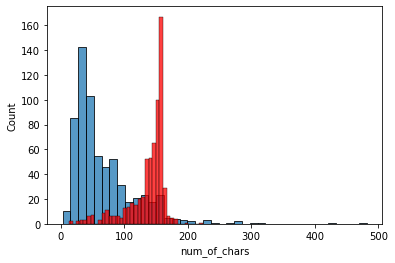

In [47]:
sns.histplot(df[df['target'] == 0]['num_of_chars'])
sns.histplot(df[df['target'] == 1]['num_of_chars'],color='red')

#shows ham msg contains less num_of_chars than spam msgs

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

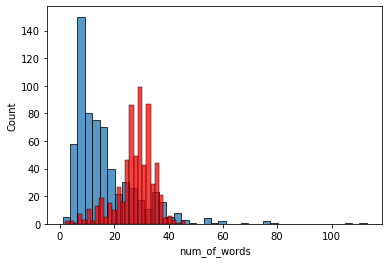

In [48]:
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'],color='red')

#shows ham msg contains less num_of_words than spam msgs

In [49]:
#calculating correlation
df.corr()

,target,num_of_chars,num_of_words,num_of_sent
target,1.000000,0.631676,0.466973,0.375077
num_of_chars,0.631676,1.000000,0.945635,0.575862
num_of_words,0.466973,0.945635,1.000000,0.621173
num_of_sent,0.375077,0.575862,0.621173,1.000000


<AxesSubplot:>

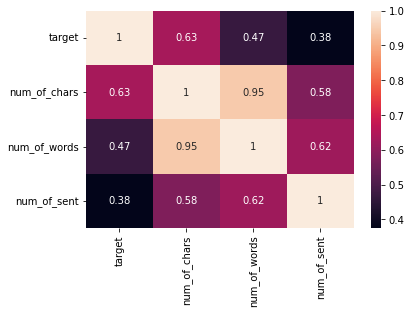

In [50]:
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing**
<br>Analyzing top words used in spam and ham msgs.
<br>
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [59]:
#we will perform all the above operation inside transform function

def transform(text):
    text = text.lower() #transform the given data into lower case
    text = nltk.word_tokenize(text) #split the data(sentences) into words
    
    y = []
    for i in text:
        if i.isalnum(): #removing special characters
            y.append(i)
    text = y.copy()
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:#removing stop words and punctuation
            y.append(i)
            
    text = y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    #return y- this returns list of different words.

In [139]:
transform('Hello I am %% Fine. my name is gaurav?, I\'m, living with my friends')

'hello fine name gaurav live friend'

In [61]:
import nltk
from nltk.corpus import stopwords

In [62]:
#to see stopwords in english
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [63]:
#for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
#for stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [65]:
df['transformed_text'] = df['text'].apply(transform)

In [66]:
df.head()

,target,text,num_of_chars,num_of_words,num_of_sent,transformed_text
989,0,Ugh. Gotta drive back to sd from la. My butt i...,53,16,3,ugh got ta drive back sd la butt sore
1093,0,Well the weather in cali's great. But its comp...,188,44,5,well weather cali great complex great need car...
140,0,"K, text me when you're on the way",33,10,1,k text way
2259,0,Ill call you evening ill some ideas.,36,8,1,ill call even ill idea
1155,0,"Sorry man, accidentally left my phone on silen...",91,20,1,sorri man accident left phone silent last nigh...


In [67]:
!pip install wordcloud

In [68]:
from wordcloud import WordCloud

In [69]:
wc = WordCloud(width=500,height=300,min_font_size=10,background_color='white')

In [70]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

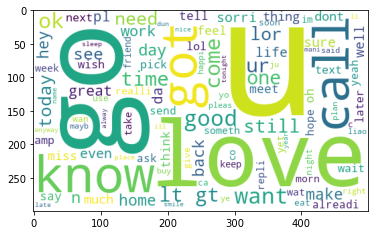

In [141]:

plt.imshow(spam_wc)

In [72]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

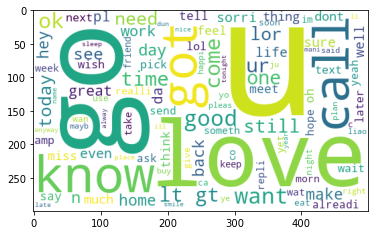

In [73]:
plt.imshow(ham_wc)

In [74]:
#identifying most used words in spam or ham msg

#for spam
spam_corpus = []

#for ham
ham_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
   

In [75]:
#spam_corpus- total spam words in transformed_text
len(spam_corpus)

9939

In [76]:
len(ham_corpus)

5042

In [77]:
type(spam_corpus)

list

In [78]:
from collections import Counter

In [79]:
Counter(spam_corpus).most_common(15)
#these are most common 15 words used in spam messegs

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64)]

In [80]:
Counter(ham_corpus).most_common(15)
#these are most common 15 words used in ham messegs

[('u', 138),
 ('2', 60),
 ('go', 55),
 ('get', 52),
 ('know', 41),
 ('love', 39),
 ('got', 32),
 ('call', 32),
 ('good', 32),
 ('gt', 32),
 ('want', 32),
 ('lt', 31),
 ('ok', 31),
 ('come', 31),
 ('like', 28)]

In [81]:
data = pd.DataFrame(Counter(spam_corpus).most_common(15))

In [82]:
data.columns = ['text','number']

In [83]:
data

,text,number
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<AxesSubplot:xlabel='text', ylabel='number'>

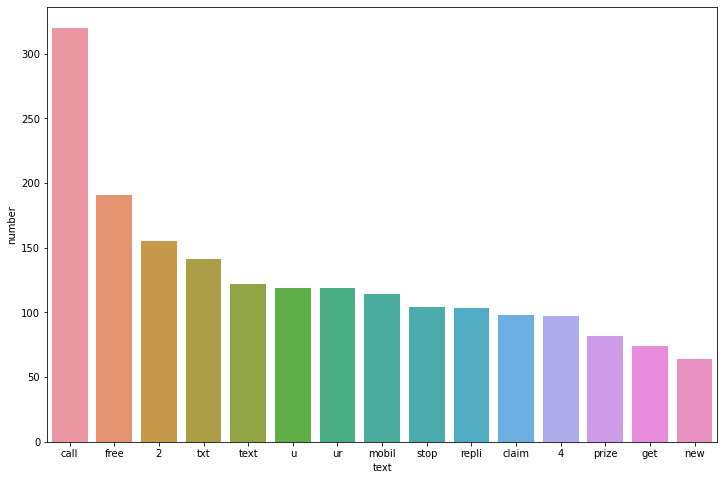

In [84]:
plt.figure(figsize=(12,8))
sns.barplot(x=data['text'],y=data['number'])
#barplot for better visualization of most 15 words used in ham msg

**Model Building**

In [85]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [86]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [87]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
X.shape

(1306, 3000)

In [89]:
y = df['target'].values

In [90]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [91]:
y.shape

(1306,)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [94]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [95]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [142]:
mnb_model = mnb.fit(X_train,y_train)
mnb_predict = mnb_model.predict(X_test)

print(accuracy_score(y_test,mnb_predict))
print(confusion_matrix(y_test,mnb_predict))
print(precision_score(y_test,mnb_predict))

0.9427480916030534
[[114   6]
 [  9 133]]
0.9568345323741008


In [96]:
gnb_model = gnb.fit(X_train,y_train)
gnb_predict = gnb_model.predict(X_test)

print(accuracy_score(y_test,gnb_predict))
print(confusion_matrix(y_test,gnb_predict))
print(precision_score(y_test,gnb_predict))

0.9351145038167938
[[114   6]
 [ 11 131]]
0.9562043795620438


In [98]:
bnb_model = bnb.fit(X_train,y_train)
bnb_predict = bnb_model.predict(X_test)

print(accuracy_score(y_test,bnb_predict))
print(confusion_matrix(y_test,bnb_predict))
print(precision_score(y_test,bnb_predict))

#BernoulliNB has highest precision score than other naive bayes algorithms for countvectorize

0.9541984732824428
[[120   0]
 [ 12 130]]
1.0


In [99]:
import joblib

In [100]:
joblib.dump(cv,'vectorize.pkl')

['vectorize.pkl']

In [101]:
joblib.dump(tfidf,'tfidf.pkl')

['tfidf.pkl']

In [102]:
joblib.dump(bnb_model,'bnb_model.sav')

['bnb_model.sav']

In [103]:
joblib.dump(mnb_model,'mnb_model.sav')

['mnb_model.sav']

testing on new data

In [162]:
#msg = 'Hey, how are you, I just want to let you known that I have reached home'
# msg = 'you just won 500$ award'


In [163]:
vectorizer = joblib.load('vectorize.pkl')
tfidf = joblib.load('tfidf.pkl')
model = joblib.load('bnb_model.sav')
model_mnb = joblib.load('mnb_model.sav')

In [164]:
data = transform(msg)

In [165]:
data

'hello name gaurav thagunna'

In [166]:
type(data)

str

In [167]:
#transformed_data = vectorizer.transform([data])
transformed_data = tfidf.transform([data])


In [168]:
prediction = model_mnb.predict(transformed_data)

In [169]:
#0 for ham and 1 for spam
prediction[0]

1